In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Covid Data.csv")

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.columns=[col.lower() for col in df.columns]

In [5]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [11]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

intubed
848544
0
7325

pneumonia
0
0
16003

age
135
124
86

pregnant
523511
3754
0

diabetes
0
3338
0

copd
0
3003
0

asthma
0
2979
0

inmsupr
0
3404
0

hipertension
0
3104
0

other_disease
0
5045
0

cardiovascular
0
3076
0

obesity
0
3032
0

renal_chronic
0
3006
0

tobacco
0
3220
0

clasiffication_final
0
0
0

icu
848544
0
7488



In [12]:
df.groupby(['pregnant', 'sex'])['sex'].count()

pregnant  sex
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: sex, dtype: int64

In [13]:
df.pregnant = df.pregnant.replace(97, 2)

In [14]:
df.pregnant.value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [15]:
df.groupby(['intubed', 'patient_type'])['patient_type'].count()

intubed  patient_type
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: patient_type, dtype: int64

In [16]:
df.groupby(['icu', 'patient_type'])['patient_type'].count()

icu  patient_type
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: patient_type, dtype: int64

In [17]:

df.drop(['intubed', 'icu'], axis=1, inplace=True)

In [18]:
df.head(5)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [19]:
df.drop(df.index[df.pneumonia == 99], axis=0, inplace=True)
df.drop(df.index[df.pregnant == 98], axis=0, inplace=True)
df.drop(df.index[df.copd == 98], axis=0, inplace=True)
df.drop(df.index[df.diabetes == 98], axis=0, inplace=True)
df.drop(df.index[df.asthma == 98], axis=0, inplace=True)
df.drop(df.index[df.inmsupr == 98], axis=0, inplace=True)
df.drop(df.index[df.other_disease == 98], axis=0, inplace=True)
df.drop(df.index[df.cardiovascular == 98], axis=0, inplace=True)
df.drop(df.index[df.obesity == 98], axis=0, inplace=True)
df.drop(df.index[df.renal_chronic == 98], axis=0, inplace=True)
df.drop(df.index[df.tobacco == 98], axis=0, inplace=True)

In [20]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

pneumonia
0
0
0

age
128
115
79

pregnant
0
0
0

diabetes
0
0
0

copd
0
0
0

asthma
0
0
0

inmsupr
0
0
0

hipertension
0
178
0

other_disease
0
0
0

cardiovascular
0
0
0

obesity
0
0
0

renal_chronic
0
0
0

tobacco
0
0
0

clasiffication_final
0
0
0



In [21]:
##There are no missing value are present.

In [23]:
def died(row):
    if row == '9999-99-99':
        return 2
    else:
        return 1

In [25]:
df['died'] = df.date_died.apply(died)

In [26]:
df.drop('date_died', axis=1, inplace=True)

In [27]:
df.head(5)

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


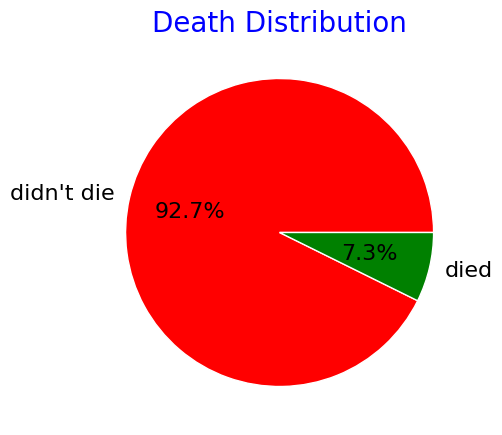

In [28]:
fig, ca = plt.subplots(figsize=(5, 5))
ca.pie(
    df.died.value_counts().values, labels=['didn\'t die', 'died'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['red', 'green']
)
ca.set_title('Death Distribution', fontsize=20, color='blue')
plt.show()


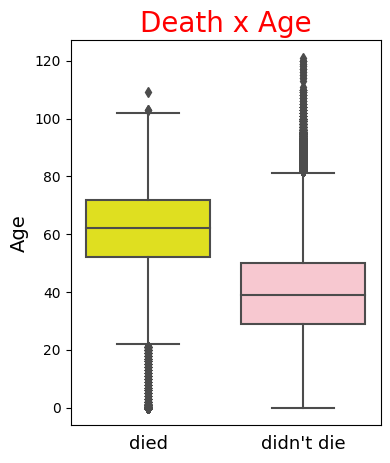

In [29]:
plt.figure(figsize=(4, 5))
sns.boxplot(data=df, x='died', y='age', palette=sns.color_palette(['yellow', 'pink']))
plt.title('Death x Age', color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=13);

In [30]:
#Here we can see death rate is more in older people.

([<matplotlib.axis.XTick at 0x7f9fd88159c0>,
 [Text(0, 0, 'Women'), Text(1, 0, 'Men')])

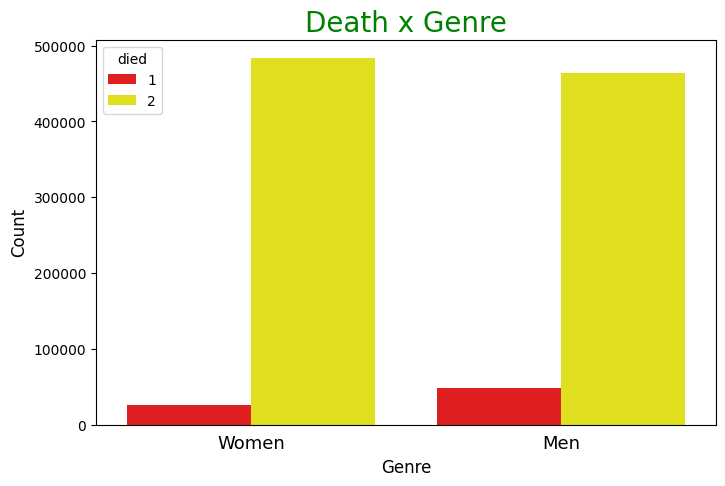

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='died', palette=sns.color_palette(['red', 'yellow']))
plt.title('Death x Genre', fontsize=20, color='g')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Women', 'Men'], fontsize=13)

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('died', axis=1), df.died, test_size=0.3, random_state=33)

In [36]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(715508, 18)
(715508,)
(306647, 18)
(306647,)


In [37]:
df_train = pd.concat([X_train, y_train], axis=1)
print(df_train.shape)
df_train.head()

(715508, 19)


,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
464856,2,12,2,2,1,60,2,1,2,2,2,1,2,2,2,2,2,3,1
748415,2,12,2,1,2,29,2,2,2,2,2,2,2,2,2,2,2,7,2
766179,2,12,1,1,2,48,2,2,2,2,2,2,2,2,2,2,2,7,2
76169,1,4,2,1,2,32,2,2,2,2,2,1,2,2,2,2,2,3,2
967893,1,12,1,1,2,55,2,2,2,2,2,2,2,2,1,2,2,7,2


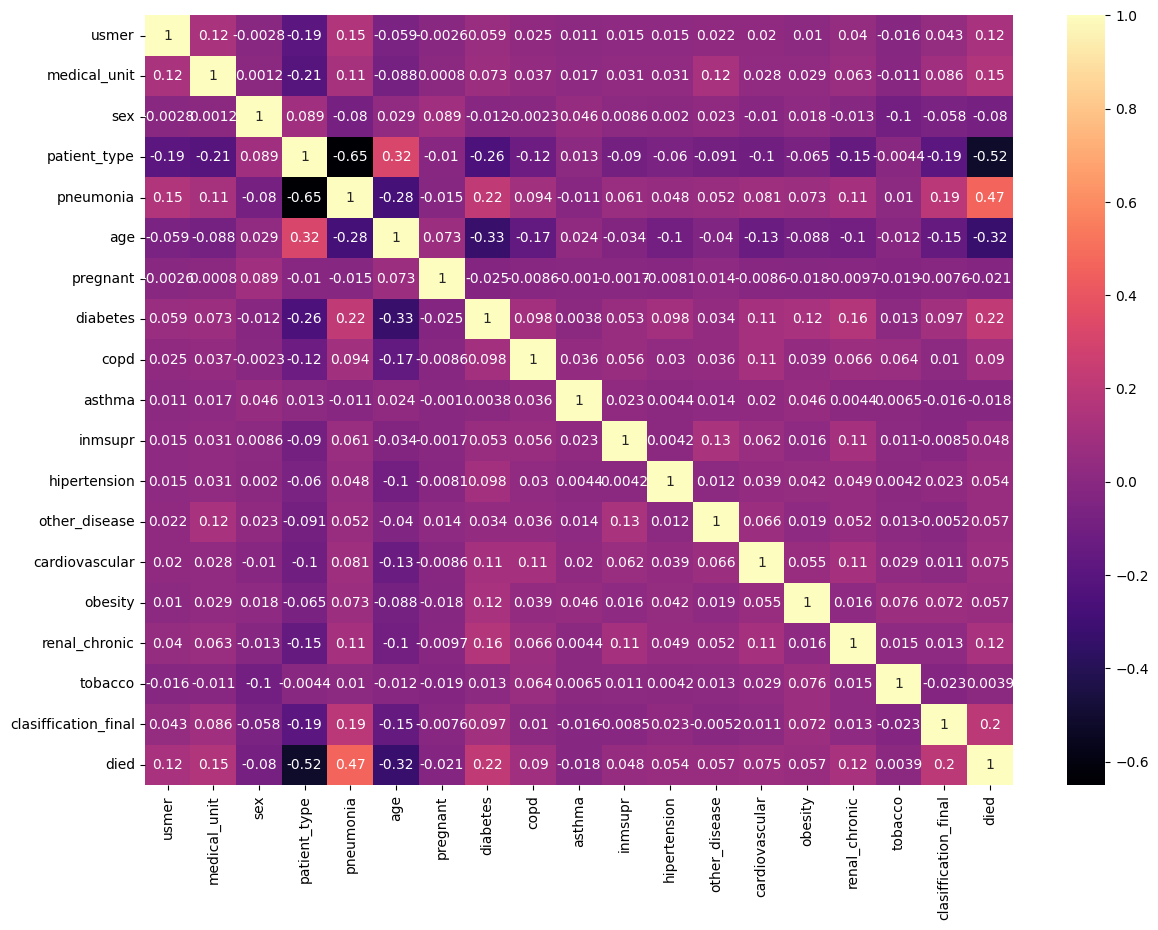

In [38]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='magma');